In [26]:
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras import models
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from random import seed
from random import randint
import random
from scipy import spatial
from sklearn.metrics import log_loss
from sklearn.metrics import coverage_error
from sklearn.metrics import f1_score

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
num_classes = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
x_train = (x_train/255) - 0.5
x_test = (x_test/255) - 0.5
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [4]:
resnetv1_20 = models.load_model('resnet_model.h5') 
resnetv1_20.load_weights('resnetv1_20Weights_bg.h5')

In [5]:
alexNet = models.load_model('alexnet_model.h5') 
alexNet.load_weights('alexNetWeights_bg.h5')

In [6]:
cnn = models.load_model('cnn_model.h5') 
cnn.load_weights('cnnWeights_bg.h5')

C:\Users\Renan\Miniconda3\envs\Renan\lib\site-packages\keras\models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [7]:
cnn_pred_train = cnn.predict(x_train)
alexNet_pred_train = alexNet.predict(x_train)
resnet_pred_train = resnetv1_20.predict(x_train)

In [47]:
def createRandomIndv():
    return np.random.choice([0, 1], size=24)
def getWeights(indv):
    w1 = indv[0:7]
    w1 = w1.dot(1 << np.arange(w1.size)[::-1])
    w2 = indv[8:15]
    w2 = w2.dot(1 << np.arange(w2.size)[::-1])
    w3 = indv[16:23]
    w3 = w3.dot(1 << np.arange(w3.size)[::-1])
    return w1,w2,w3

def createInitPop(pop_size):
    pop = list()
    for i in range (pop_size):
        pop.append([createRandomIndv(),0])
    return pop

def xover(indv1,indv2):
    split = np.random.randint(1,len(indv1)-1)
    child_1 = np.hstack((indv1[0:split],
                        indv2[split:]))
    
    child_2 = np.hstack((indv2[0:split],
                        indv1[split:]))
    return child_1, child_2

def mutation(indv):
    gene = np.random.randint(0,len(indv)-1)
    indv[gene] = 1-indv[gene]
    return indv

def fitnessCalc(indv,target):
    w1,w2,w3 = getWeights(indv)
    num=w1*cnn_pred_train+w2*alexNet_pred_train+w3*resnet_pred_train
    dem=w1+w2+w3
    newY = num/dem
    pred = [np.argmax(y, axis=None, out=None) for y in newY]
    
    return accuracy_score(target,pred)

def calcFitPop(pop,target):
    totalFitness = list()
    for i in range(len(pop)):
        totalFitness.append(fitnessCalc(pop[i,0],target))
    return totalFitness

def tournamentSelection(pop, target):
    pop_size = len(pop)

    indv1 = random.randint(0, pop_size-1)
    indv2 = random.randint(0, pop_size-1)
    
    if pop[indv1][1] > pop[indv2][1]:
        return pop[indv1][0]
    else:
        return pop[indv2][0] 
def evaluate(pop, target):
    for i in range(len(pop)):
        pop[i,1] = fitnessCalc(pop[i,0],target)
    pop = sorted(pop, key=lambda x: x[1])
    pop = pop[::-1]
    return pop
def survival(pop):
    l= int(len(pop)/2)
    return pop[0:l]
    

Initial
Best: (80, 62, 52)
Fitness: 0.963
Total Fitness:  47.077
Generation:  0
Best: (106, 74, 53)
Fitness: 0.963
Total Fitness:  48.048
Generation:  1
Best: (118, 124, 84)
Fitness: 0.963
Total Fitness:  48.114
Generation:  2
Best: (80, 78, 52)
Fitness: 0.963
Total Fitness:  48.125
Generation:  3
Best: (84, 74, 52)
Fitness: 0.963
Total Fitness:  48.133
Generation:  4
Best: (84, 74, 52)
Fitness: 0.963
Total Fitness:  48.143
Generation:  5
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.149
Generation:  6
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.152
Generation:  7
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.155
Generation:  8
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.157
Generation:  9
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.159
Generation:  10
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  11
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  12
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  

Generation:  112
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  113
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  114
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  115
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  116
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  117
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  118
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  119
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  120
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  121
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  122
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  123
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  124
Best: (84, 72, 52)
Fitness: 0.963
Total Fitness:  48.161
Generation:  125
Best: (84, 72, 52)
Fi

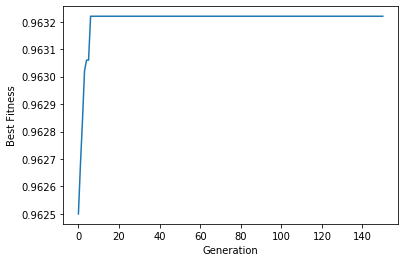

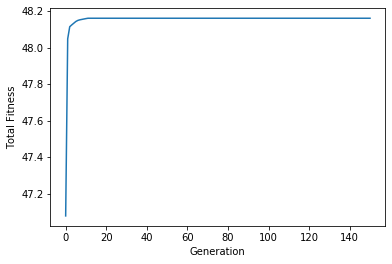

In [53]:
pop_size = 50
num_generation=150
#target = y_train
target = y_train_nocategorical
bestF = []
totalF = []
mutation_rate = 0.1

pop =  np.array(createInitPop(pop_size))
pop = evaluate(pop,target)
best_score = pop[0][1]
bestIndv = pop[0][0]
totalScore = sum(pop[:])
totalScore = totalScore[1]
print('Initial')
print('Best:',getWeights(bestIndv))
print ('Fitness: %.3f' %best_score)
print('Total Fitness:  %.3f' %totalScore)
bestF.append(best_score)
totalF.append(totalScore)

for generation in range(num_generation):
    newpop = []
    pop_aux = int(pop_size/2)


    for i in range(pop_aux):
        parent_1 = tournamentSelection(pop, target)
        parent_2 = tournamentSelection(pop, target)
        child_1, child_2 = xover(parent_1, parent_2)
        if(np.random.uniform() < mutation_rate):
            mutation(child_1)
        if(np.random.uniform() < mutation_rate):
            mutation(child_2)
        child_1 = [child_1,0]
        child_2 = [child_2,0]
        newpop.append(child_1)
        newpop.append(child_2)
    newpop =  np.concatenate((pop,newpop))
    newpop = evaluate(newpop,target)
    pop = survival(newpop)
    best_score = pop[0][1]
    bestIndv = pop[0][0]
    totalScore = sum(pop[:])
    totalScore = totalScore[1]
       

    print('Generation: ',generation)
    print('Best:',getWeights(bestIndv))
    print ('Fitness: %.3f' %best_score)
    print('Total Fitness:  %.3f' %totalScore)
    bestF.append(best_score)
    totalF.append(totalScore)


import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(bestF)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.show()


%matplotlib inline
plt.plot(totalF)
plt.xlabel('Generation')
plt.ylabel('Total Fitness')
plt.show()


In [54]:
w = getWeights(bestIndv)
ga_pred_train =  (w[0]*cnn_pred_train+w[1]*alexNet_pred_train+w[2]*resnet_pred_train)/(sum(w))

In [55]:
y_train_nocategorical = [np.argmax(y, axis=None, out=None) for y in y_train]
y_cnn_pred_train = [np.argmax(y, axis=None, out=None) for y in cnn_pred_train]
y_alexNet_pred_train= [np.argmax(y, axis=None, out=None) for y in alexNet_pred_train]
y_resnet_pred_train= [np.argmax(y, axis=None, out=None) for y in resnet_pred_train]
y_ga_pred_train= [np.argmax(y, axis=None, out=None) for y in ga_pred_train]

In [56]:
from sklearn.metrics import accuracy_score
print('Training Baseline CNN Accuracy: %.4f' %(accuracy_score(y_train_nocategorical, y_cnn_pred_train)*100),'%')
print('Training AlexNet Accuracy: %.4f' %(accuracy_score(y_train_nocategorical, y_alexNet_pred_train)*100),'%')
print('Training ResNet20 Accuracy: %.4f' %(accuracy_score(y_train_nocategorical, y_resnet_pred_train)*100),'%')
print('Training Propose Accuracy: %.4f' %(accuracy_score(y_train_nocategorical, y_ga_pred_train)*100),'%')


Training Baseline CNN Accuracy: 89.5680 %
Training AlexNet Accuracy: 95.1840 %
Training ResNet20 Accuracy: 87.1980 %
Training Propose Accuracy: 96.3220 %


In [57]:
cnn_pred_test = cnn.predict(x_test)
alexNet_pred_test = alexNet.predict(x_test)
resnet_pred_test = resnetv1_20.predict(x_test)
ga_pred = (w[0]*cnn_pred_test+w[1]*alexNet_pred_test+w[2]*resnet_pred_test)/(sum(w))

In [58]:
y_test_nocategorical = [np.argmax(y, axis=None, out=None) for y in y_test]
y_cnn_pred_test = [np.argmax(y, axis=None, out=None) for y in cnn_pred_test]
y_alexNet_pred_test= [np.argmax(y, axis=None, out=None) for y in alexNet_pred_test]
y_resnet_pred_test= [np.argmax(y, axis=None, out=None) for y in resnet_pred_test]
y_ga_pred_test= [np.argmax(y, axis=None, out=None) for y in ga_pred]


In [59]:
print('Test Baseline CNN Accuracy: %.4f' %(accuracy_score(y_test_nocategorical, y_cnn_pred_test)*100),'%')
print('Test AlexNet Accuracy: %.4f' %(accuracy_score(y_test_nocategorical, y_alexNet_pred_test)*100),'%')
print('Test ResNet20 Accuracy: %.4f' %(accuracy_score(y_test_nocategorical, y_resnet_pred_test)*100),'%')
print('Test Propose Accuracy: %.4f' %(accuracy_score(y_test_nocategorical, y_ga_pred_test)*100),'%')



Test Baseline CNN Accuracy: 76.7900 %
Test AlexNet Accuracy: 77.1600 %
Test ResNet20 Accuracy: 70.9800 %
Test Propose Accuracy: 81.9000 %


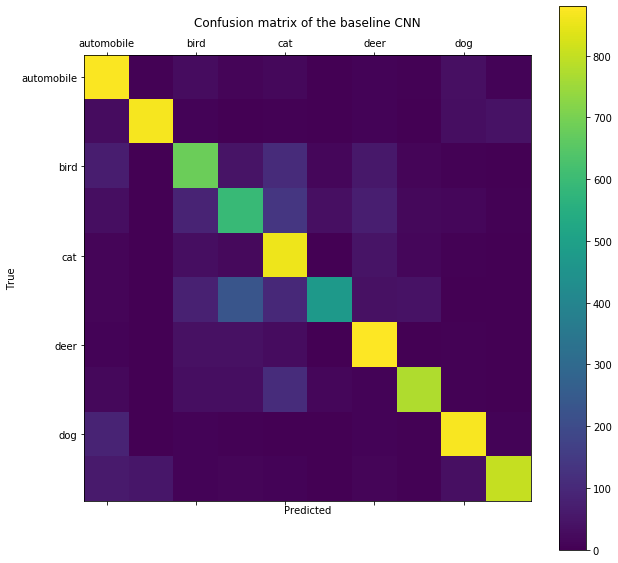

In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_nocategorical,y_cnn_pred_test)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the baseline CNN')
fig.colorbar(cax)
ax.set_xticklabels(cifar10_classes)
ax.set_yticklabels(cifar10_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

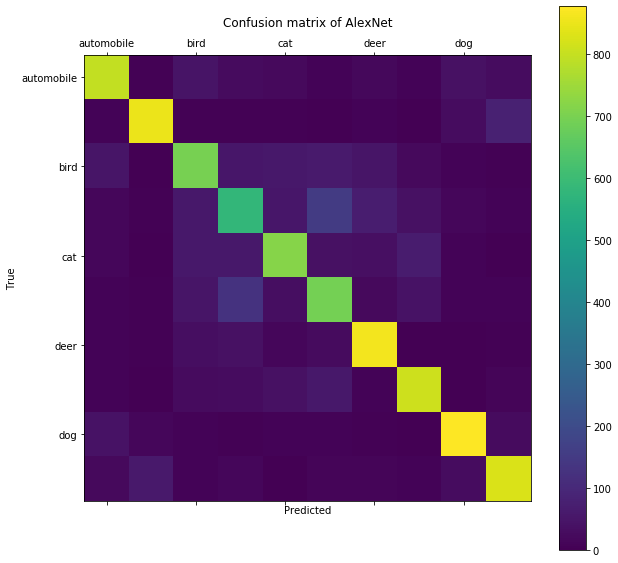

In [61]:
cm = confusion_matrix(y_test_nocategorical,y_alexNet_pred_test)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of AlexNet')
fig.colorbar(cax)
ax.set_xticklabels(cifar10_classes)
ax.set_yticklabels(cifar10_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

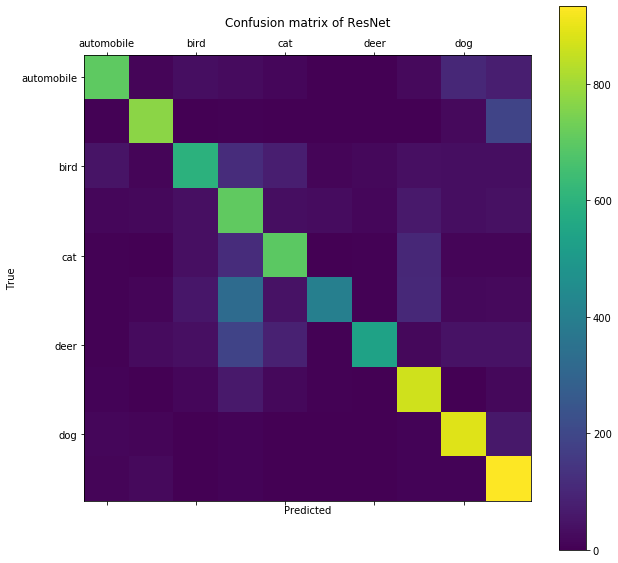

In [62]:
cm = confusion_matrix(y_test_nocategorical,y_resnet_pred_test)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of ResNet')
fig.colorbar(cax)
ax.set_xticklabels(cifar10_classes)
ax.set_yticklabels(cifar10_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

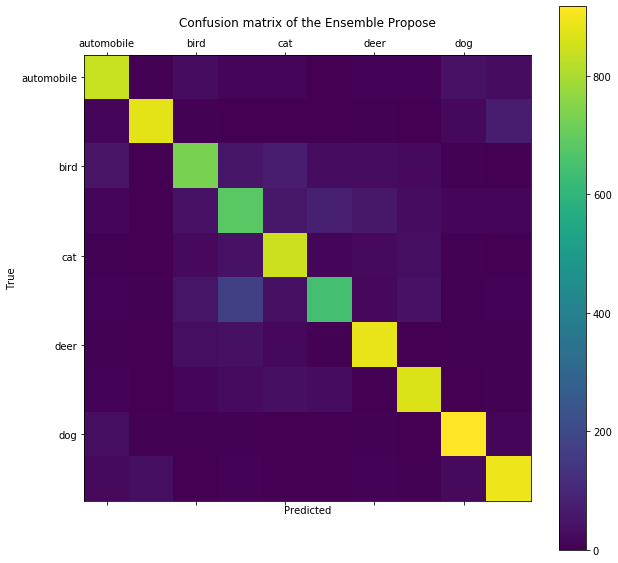

In [63]:
cm = confusion_matrix(y_test_nocategorical,y_ga_pred_test)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Ensemble Propose')
fig.colorbar(cax)
ax.set_xticklabels(cifar10_classes)
ax.set_yticklabels(cifar10_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()